# Orbital Homework Notebook

Shirin Kuppusamy

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

<Unit('kilogram')>

### Exercises

**Exercise:** Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Use `run_ode_solver` to answer this question.

Here are some suggestions about how to proceed:

1.  Look up the Law of Universal Gravitation and any constants you need.  I suggest you work entirely in SI units: meters, kilograms, and Newtons.

2.  When the distance between the Earth and the Sun gets small, this system behaves badly, so you should use an event function to stop when the surface of Earth reaches the surface of the Sun.

3. Express your answer in days, and plot the results as millions of kilometers versus days.

If you read the reply by Dave Rothstein, you will see other ways to solve the problem, and a good discussion of the modeling decisions behind them.

You might also be interested to know that [it's actually not that easy to get to the Sun](https://www.theatlantic.com/science/archive/2018/08/parker-solar-probe-launch-nasa/567197/).

In [3]:
init = State(x = 147100000000 * m, y = 0 * m, vx = 0 * m/s, vy = -30330 * m/s)

,values
x,147100000000 meter
y,0 meter
vx,0.0 meter / second
vy,-30330.0 meter / second


In [4]:
system = System(init = init, G = 6.67e-11 * (m**3/(kg*(s**2))),Me = 5.972e24 * kg, Ms = 1.989e30 * kg, g = 9.8 * m/s**2, t_end = 3.154e7 * s)

,values
init,x 147100000000 meter y ...
G,6.67e-11 meter ** 3 / kilogram / second ** 2
Me,5.972e+24 kilogram
Ms,1.989e+30 kilogram
g,9.8 meter / second ** 2
t_end,31540000.0 second


In [36]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x,y,vx,vy = state
    position = Vector(x,y) * m
    velocity = Vector(vx,vy) * (m/s)
    unpack(system) 
    
    
    dposdt = velocity
    dveldt = ((G * Ms)/position.mag**2)
    direction = -position.hat()
    acceleration = dveldt * direction
    
    return dposdt.x, dposdt.y, acceleration[0], acceleration[1]

In [38]:
slope_func(init,0,system)

(<Quantity(0.0, 'meter ** 2 / second ** 2')>,
 <Quantity(-30330.0, 'meter ** 2 / second ** 2')>,
 <Quantity(-0.006131055840054791, '1 / meter / second ** 2')>,
 <Quantity(-0.0, '1 / meter / second ** 2')>)

In [39]:
results, details = run_ode_solver(system, slope_func, max_step=10000*s,method='RK23') #events=event_func,
details.message
results.head()

,x,y,vx,vy
0.000000e+00,1.471000e+11,0.000000,0.000000e+00,-30330.0
4.662755e-08,1.471000e+11,-0.001414,-2.858761e-10,-30330.0
5.129030e-07,1.471000e+11,-0.015556,-3.144637e-09,-30330.0
5.175658e-06,1.471000e+11,-0.156978,-3.173225e-08,-30330.0
5.180321e-05,1.471000e+11,-1.571191,-3.176083e-07,-30330.0


In [40]:
results.index /= (60*60*24)

In [41]:
results.x /= 1e9
results.y /= 1e9

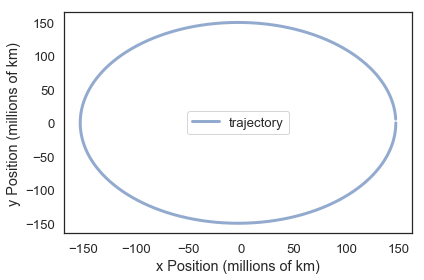

In [42]:
def plot_position(results):
    plot(results.x, results.y, label='trajectory')
    decorate(xlabel='x Position (millions of km)',
             ylabel='y Position (millions of km)')

plot_position(results)